Nhap vao vecto X: 1, 2, 3, 4, 7
Nhap vao vector Y: 17, 17.5, 76, 210.5, 1970

Da thuc noi suy cua bo diem da cho la: 
[   2.   -17.    81.  -153.5  104.5]
Ta kiem tra lai gia tri cua da thuc noi suy Lagrange tai cac diem moc: 
Tai x = 1.0, y = 16.999999999999915.
Tai x = 2.0, y = 17.4999999999998.
Tai x = 3.0, y = 75.99999999999955.
Tai x = 4.0, y = 210.49999999999906.
Tai x = 7.0, y = 1969.9999999999948.


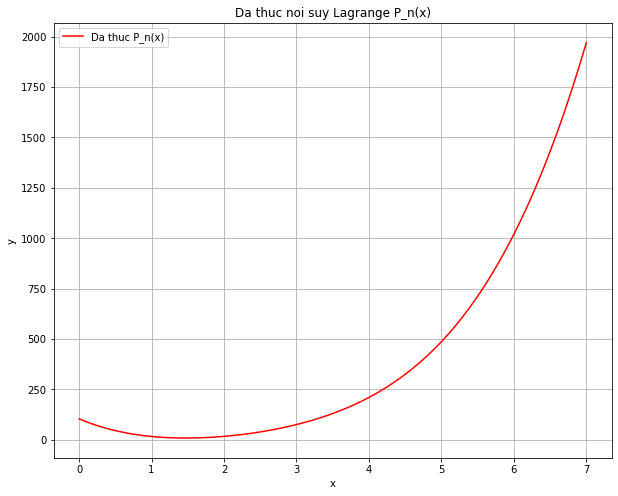

In [5]:
import numpy as np 
import matplotlib.pyplot as plt 

# Thuat toan Horner nguoc, de tinh he so cua da thuc P_n(x) tu tich cua cac don thuc (x-x_k). 
def HornerInverseMethod(X):
    W = np.array([])
    W = np.append(W, 1)
    W = np.append(W, -X[0])
    
    for i in np.arange(1, len(X)):             
        ithMulti = np.array([X[i] * k for k in W])
        
        W = np.append(W, 0)   
        for i in np.arange(1, len(W)): 
            W[i] = W[i] - ithMulti[i - 1]
            
    return W

# Thuat toan Horner xuoi, de tinh he so cua da thuc thuong Q_(x) khi chia da thuc P_n(x) cho don thuc (x-c). 
def HornerMethod(P, c): 
    Q = np.array([])            
    Q = np.append(Q, P[0])    
    
    for i in np.arange(1, len(P) - 1): 
        q = P[i] + Q[i - 1] * c 
        Q = np.append(Q, q)
    
    return Q

# Ham thuc thi chinh cua chuong trinh. 
def main(X, Y): 
    W = HornerInverseMethod(X)  # Tinh he so cua da thuc W_(n+1)(x) bang thuat toan Horner nguoc. 
    
    L = np.zeros(len(X))     # Khoi tao mang L (de luu cac da thuc co so Lagrange) la mang rong. 
    for j in np.arange(len(X)): 
        Lj = HornerMethod(W, X[j])  # Tinh Lj = W_(n+1)(x)/(x-X[j]). 
        if j == 0:                  # 4 dong tiep theo: them Lj vao mang L. 
            L = np.array([Lj])
        else: 
            L = np.append(L, [Lj], axis = 0)
        
    addiCoef = np.array([])   # Khoi tao addiCoef (he so them vao) la mang rong. 
    for i in np.arange(len(X)):   # tinh dao ham W'_(n+1)(x) tai x_i. (7 dong tiep theo)
        deriWi = 1
        for j in np.arange(len(X)): 
            if X[j] != X[i]: 
                deriWi = deriWi * (X[i] - X[j])
            else: 
                continue
        addiCoef = np.append(addiCoef, Y[i] / deriWi)  # luu Y[i]/deriWi vao mang addiCoef. 
    
    for j in np.arange(len(L)):   # 2 dong tiep theo: nhan phan tu thu j cua mang L voi phan tu thu j tuong ung cua mang addiCoef. 
        L[j] = L[j] * addiCoef[j]
        
    Pn = np.zeros(len(L[0]))  # Khoi tao mang Pn la mang rong, do dai bang mang Lj. 
    for i in np.arange(len(L)): # Cong cac cot tuong ung cua cac mang L lai voi nhau, roi luu vao mang Pn. 
        Pn = Pn + L[i]
    
    print()
    print("Da thuc noi suy cua bo diem da cho la: ")
    print(Pn)
    return Pn

# Ham tinh gia tri cua da thuc P_n(x) tai mot diem x bat ky. 
def polyEval(x, Pn): 
    Q = []            
    Q.append(Pn[0])    
    for i in range(1, len(Pn)): 
        y = Pn[i] + Q[i - 1] * x 
        Q.append(y)
        
    return y

# Input nhap vao vector X va vecto Y. 
text1 = input("Nhap vao vecto X: ")
X = text1.split(", ")
X = np.array([float(i) for i in X])
    
text2 = input("Nhap vao vector Y: ")
Y = text2.split(", ")
Y = np.array([float(i) for i in Y])

# Chuong trinh bat dau thuc thi tu day. 
Pn = main(X, Y)
# Ta kiem tra lai gia tri cua da thuc noi suy tai cac diem moc de chac chan rang ket qua thu duoc la dung. 
print("Ta kiem tra lai gia tri cua da thuc noi suy Lagrange tai cac diem moc: ")
for xi in X: 
    yi = polyEval(xi, Pn)
    print("Tai x = %s, y = %s." % (xi, yi))
    
# Ve do thi cua da thuc noi suy Lagrange. 
plt.figure(figsize = (10, 8))

x = np.linspace(0, 7, 71)
y = polyEval(x, Pn)

plt.plot(x, y, 'r-')

plt.xlabel('x')
plt.ylabel('y')

plt.legend(['Da thuc P_n(x)'])
plt.title('Da thuc noi suy Lagrange P_n(x)')

plt.grid()
plt.show()